![ml](figs/ml_map.png)

In [4]:
import pandas as pd
print(f'pandas: {pd.__version__}')

import numpy as np
print(f'numpy: {np.__version__}')

import matplotlib
print(f'matplotlib: {matplotlib.__version__}')
import sklearn
print(f'sklearn: {sklearn.__version__}')

pandas: 0.20.3
numpy: 1.13.3
matplotlib: 2.1.0
sklearn: 0.19.1


In [8]:
# load processed data
dfFV = pd.read_csv("titanic_FV.csv")
# header = None mean's that the survived CSV has no column labels
survived = pd.read_csv("survived.csv", header=None)

In [17]:
pd.read_csv("survived.csv").shape

(711, 1)

In [18]:
#convert survived to array of 0s and 1s
survived.values.flatten().astype(int)
survived_array = survived.values.flatten().astype(int)

![proj](figs/proj.jpg)

In [26]:
dfFV.drop(['Fareq'], axis=1, inplace=True)

In [27]:
#http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
from sklearn.decomposition import PCA

pca = PCA(random_state=7414)
pca.fit(dfFV)
df_reduced = pca.transform(dfFV)
pca_score = pca.explained_variance_ratio_
pca_weights = pca.components_


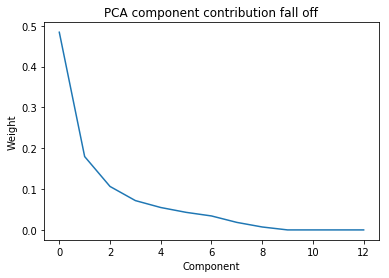

In [28]:
# Scree Plot: Eigenvalue vs. component number 
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots()
ax.set_title("PCA component contribution fall off")
ax.plot(pca_score)
ax.set_xlabel("Component")
ax.set_ylabel("Weight")
plt.show()

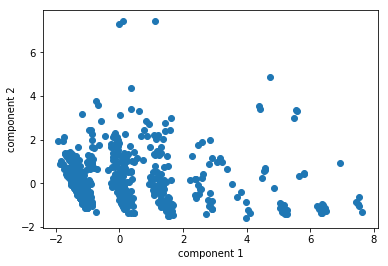

In [29]:
#Since drastically falls off by 3rd component, lets plot the first two
fig, ax = plt.subplots()
#grab all rows of first and second components (columns of df_reduced)
ax.scatter(df_reduced[:,0], df_reduced[:,1])
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
plt.show()

In [30]:
# lets use boolean masks to add class information: 1=True, 0=False
# values turns the dataframe into a 2D array, flatten makes it 1D
mask = survived_array.astype(bool)
yes = df_reduced[mask]
no = df_reduced[~mask]

In [31]:
#let's check that the above worked
yes.shape, no.shape

((288, 13), (424, 13))

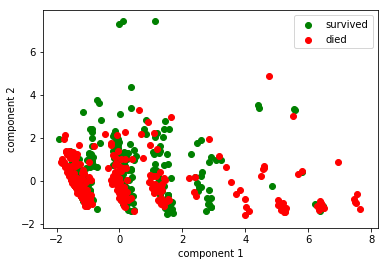

In [32]:
fig, ax = plt.subplots()
ax.scatter(yes[:,0], yes[:,1], label="survived", color="g")
ax.scatter(no[:,0], no[:,1], label="died", color="r")                                   
ax.set_xlabel("component 1")
ax.set_ylabel("component 2")
ax.legend(scatterpoints=1)

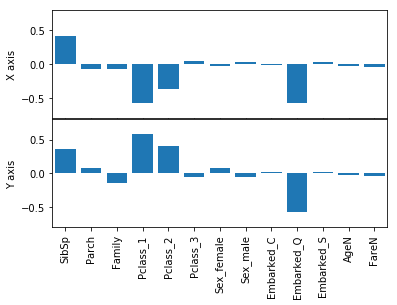

In [33]:
#and lets look at what determines the directionality
fig, (ax1, ax2) = plt.subplots(nrows=2)

comp1 = pca_weights.T[0]
comp2 = pca_weights.T[1]

ax1.bar(range(comp1.shape[0]), comp1, align='center')
ax1.set_xticks(range(comp1.shape[0]))
ax1.set_xlim(-.5,12.5)
ax1.set_ylim(-.8,.8)
ax1.set_ylabel("X axis")

ax2.bar(range(comp2.shape[0]), comp2, align='center')
ax2.set_xticks(range(comp2.shape[0]))
ax2.set_xticklabels(dfFV.keys(), rotation=90)
ax2.set_xlim(-.5,12.5)
ax2.set_ylim(-.8,.8)
ax2.set_ylabel("Y axis")

fig.subplots_adjust(hspace=0.010)

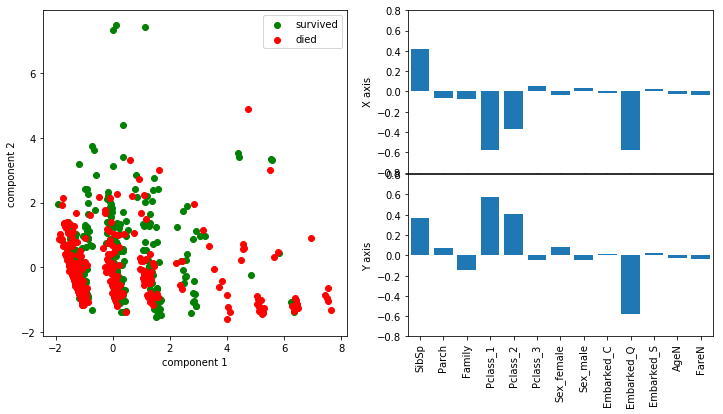

In [34]:
#We can put it all together

fig = plt.figure(figsize=(12,6))
#rows, #cols, position
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 4)

#grab all rows of first and second components (columns of df_reduced)
ax1.scatter(yes[:,0], yes[:,1], label="survived", color="g")
ax1.scatter(no[:,0], no[:,1], label="died", color="r")                                   
ax1.set_xlabel("component 1")
ax1.set_ylabel("component 2")
ax1.legend(scatterpoints=1)

#and lets look at what determines the directionality

comp1 = pca_weights.T[0]
comp2 = pca_weights.T[1]

ax2.bar(range(comp1.shape[0]), comp1, align='center')
ax2.set_xticks(range(comp1.shape[0]))
ax2.set_xlim(-.5,12.5)
ax2.set_ylim(-.8,.8)
ax2.set_ylabel("X axis")

ax3.bar(range(comp2.shape[0]), comp2, align='center')
ax3.set_xticks(range(comp2.shape[0]))
ax3.set_xticklabels(dfFV.keys(), rotation=90)
ax3.set_xlim(-.5,12.5)
ax3.set_ylim(-.8,.8)
ax3.set_ylabel("Y axis")

fig.subplots_adjust(wspace=0.2, hspace=0.010)
fig.savefig("figs/pca_graphs.png")

![pcabar](figs/pca_graphs.png)

Challenge
=====
* What does PCA yield if you only use the categorical variables?
* What does PCA yield if you only use the quantative variables?
* What does PCA yield if you only use some variables?

# So not the greatest seperation...new idea?
![kmeans](figs/kmeans.gif)
source: [Project Rhea: Introduction to Clustering](https://www.projectrhea.org/rhea/index.php/SlectureDavidRunyanCS662Spring14)

In [35]:
from sklearn.cluster import KMeans

kmean = KMeans(init='k-means++', n_clusters=2, random_state=7414)
kmean.fit(dfFV)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=7414, tol=0.0001, verbose=0)

In [36]:
# What information can we get from KMeans?
KMeans?

In [38]:
cluster0 = kmean.cluster_centers_[0]
cluster1 = kmean.cluster_centers_[1]

#built a list 0- # of features
inds = np.arange(kmean.cluster_centers_.shape[1])


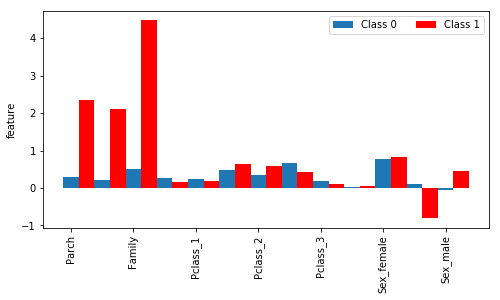

In [39]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(inds, cluster0,width=.5, align='center', label="Class 0")
ax.bar(inds+.5, cluster1, width=.5, align='center', color='r',label= "Class 1")
ax.set_xticklabels(dfFV.keys(), rotation=90)
ax.set_ylabel("feature")
ax.legend(ncol=2)

In [40]:
#accuracy? http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation
from sklearn import metrics as skm

print("Accuracy: ", skm.accuracy_score(survived_array, kmean.labels_))
#[[True Positive, False Negative]]
#[[False Positive, True Negative]]
print(skm.confusion_matrix(survived_array, kmean.labels_))

Accuracy:  0.573033707865
[[377  47]
 [257  31]]


In [41]:
# Why is the rate so bad?
labels = kmean.labels_
TP = df_reduced[((labels == mask) & (mask==1))]
FN = df_reduced[((labels!=mask) & (mask==1))]
FP = df_reduced[((labels!=mask) & (mask==0))]
TN = df_reduced[((labels==mask) & (mask==0))]

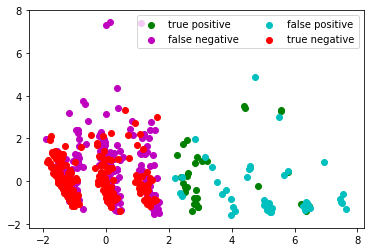

In [42]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(TP[:,0], TP[:,1], color='g', label="true positive")
ax.scatter(FN[:,0], FN[:,1], color='m', label="false negative")
ax.scatter(FP[:,0], FP[:,1], color='c', label="false positive")
ax.scatter(TN[:,0], TN[:,1], color='r', label="true negative")
ax.legend(scatterpoints=1, ncol=2)

Challenge
=====
* What do the clusters look like if there are 3?
* What do the clusters look like if init='random'?
* What happens if you change a different parameter?

# :/ those results aren't great...

Classification
========
![super](figs/croppedml.gif)
source: Rachel Rakov, originally Andrew Rosenberg

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=10)
#fits on values used for prediction, expected class
neigh.fit(dfFV.values, survived.values) 
print(neigh.score(dfFV.values, survived.values))

In [ ]:
#how do we predict the class of a value? 
# Note this example is overfitted because the classifier was trained on this data
labels = neigh.predict(dfFV)
#confusion matrix is:
#[[True Positive, False Negative]]
#[[False Positive True Negative]]
print(skm.confusion_matrix(labels, survived.values))

In [ ]:
skm.confusion_matrix?

Challenge
==========
Test out the classifier!

1) Download or open the file [`titanictest.csv`](https://github.com/GCDigitalFellows/gcdri_ts_cat_ml/blob/master/data/titanictest.csv)

2) Clean it & encode it in the same manner as `titanic.csv` as it's structured the same

3) Use the classifier to predict who survived and who didn't

4) Test your classifier using the [full training set](https://raw.githubusercontent.com/GCDigitalFellows/gcdri_ts_cat_ml/master/data/titanicfull.csv)

5) Evaluate the skill of the classifier on [kaggle](https://www.kaggle.com/c/titanic/submissions/attach)

In [ ]:
imp